In [67]:
#import libraries
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 

## Create the data and the model

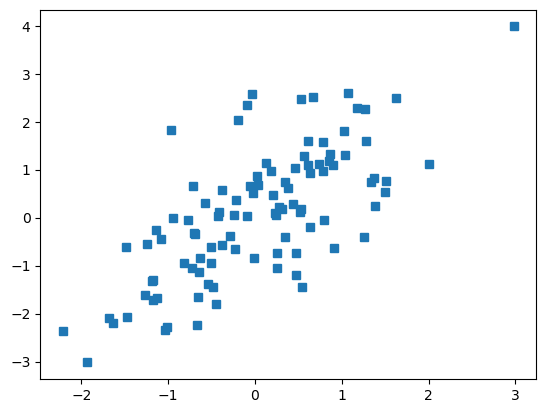

In [68]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

#and plot
plt.plot(x,y,'s')
plt.show()

In [69]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input
    nn.ReLU(), #activation funct
    nn.Linear(1,1),#output 
)

In [70]:
#model meta-parameters
learningRate = .05

#loss function
lossfun = nn.MSELoss()

#optimizer 
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

## Select data for training

In [71]:
# select training data (note the hard-coded N!)
trainidx = np.random.choice(range(N), 80, replace=False) #random indices
trainBool = np.zeros(N, dtype=bool) #initialize vector of Falses
trainBool[trainidx] = True #set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


## Train the model

In [72]:
numepochs = 500
for epoch_idx in range(numepochs):

    #forward pass
    yHat = ANNreg(x[trainBool])

    #compute loss
    loss = lossfun(yHat, y[trainBool])

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [73]:
# report the losses

#compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

#print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss:  {loss.detach():.2f}')
print(f'Final TEST loss:  {testloss.detach():.2f}')


Final TRAIN loss:  0.95
Final TEST loss:  1.00


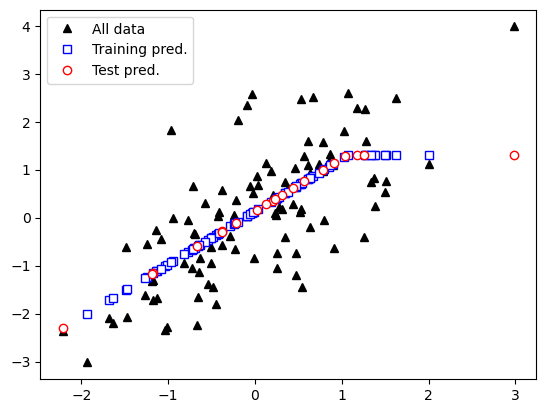

In [74]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()
     



## Aditional explorations

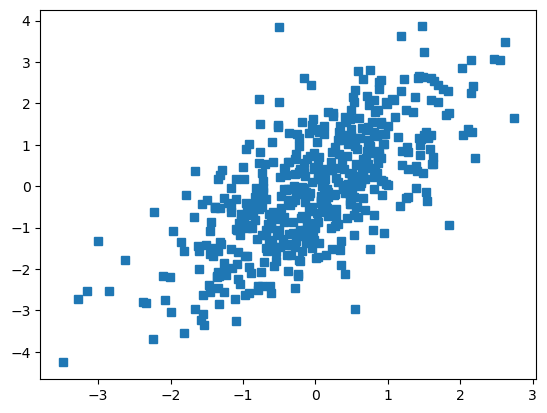

torch.Size([400, 1])
torch.Size([100, 1])


In [84]:

# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.# # select training data (note the hard-coded N!)

N = 500
x = torch.randn(N,1)
y = x + torch.randn(N,1)

#and plot
plt.plot(x,y,'s')
plt.show()



split = int(N*.8)
trainidx = np.random.choice(range(N), split, replace=False) #random indices
trainBool = np.zeros(N, dtype=bool) #initialize vector of Falses
trainBool[trainidx] = True #set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

In [85]:
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
# select training data (note the hard-coded N!)
from sklearn.model_selection import train_test_split 

train_data,test_data,train_labels,test_labels = \
    train_test_split(x,y, test_size=.2)

# Note the third input parameter above.
# This can be specified as test size or training size.
# Be mindful of which parameter is written!

#print out the sizes
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

Training data size: torch.Size([400, 1])
Test data size: torch.Size([100, 1])
 
